In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from ipywidgets import widgets
from IPython.display import display, Markdown, Latex
from matplotlib_venn import venn2

# ალბათობა 🤞🎲🎰

სიტყვა "ალბათ"-ს ყოველდღიურად ხშირად ვიყენებთ, როდესაც რაიმეს ვვარაუდობთ ან ვცდილობთ პროგნოზების გაკეთებას. მათემატიკაში, ალბათობის თეორია წარმოადგენს მეცნიერებას შემთხვევითობის შესახებ. მისი პრაქტიკული ღირებულება და მნიშვნელობა წამორჩნდება ისეთ ნამდვილ თუ წარმოსახვით ცდებთან დაკავშირებით, როგორიცაა, პირობითად, მონეტის აგდება თუ კამათლის გაგორება, ისე მნიშვნელოვანი ზოგადსაკაცობრიო მოვლენების ანალიზი და პროგნოზირება. ყველა ასეთ ცდას და დაკვირვებას სჭირდება გარკვეულ მოცემულობებზე და ტერმინოლოგიაზე შეთანხმება.

უმეტეს მოვლენას რამდენიმე შედეგი აქვს. ალბათობა გვეხმარება დავადგინოთ რამდენად მოსალოდნელია თითოეულის მოხდენა.

ამის საილუსტრაციოდ ყველაზე პრიმიტიული მაგალითი არის მონეტის აგდება: მონეტა შესაძლებელია აგდების შედეგად წიბოზე დადგეს, მაგრამ ჩვენ ვთანხმდებით, რომ ასეთ განვითარებას შესაძლო შედეგად არ განვიხილავთ. შესაბამისად, Მონეტის აგდების შედეგად, მათემატიკურად, შესაძლო შედეგი მხოლოდ ორია—ან გერბი მოვა, ან -საფასური. ინტუიუტიურადაც გასაგებია, რომ ამ მოვლენის ალბათობა ერთი მეორედია, ანუ, 50% - მოდი, ვთქვათ, საიდან მოდის ეს რიცხვი:

In [9]:
# ინტერაქტიული მონეტის აგდების სიმულაცია
def coin_flip(n):
    results = np.random.choice(['გერბი', 'საფასური'], n)
    heads = np.sum(results == 'გერბი')
    tails = n - heads

    plt.figure(figsize=(10, 5))
    plt.bar(['გერბი', 'საფასური'], [heads, tails])
    plt.title(f'{n} მონეტის აგდების შედეგი')
    plt.ylabel('რაოდენობა')
    plt.show()

    print(f"გერბის ალბათობა: {heads/n:.2f}")
    print(f"საფასურის ალბათობა: {tails/n:.2f}")

interact(coin_flip, n=widgets.IntSlider(min=1, max=10000, step=100, value=1000))

interactive(children=(IntSlider(value=1000, description='n', max=10000, min=1, step=100), Output()), _dom_clas…

<function __main__.coin_flip(n)>

### ლაპლასის ალბათობა




შემთხვევით ექსპერიმენტს, რომელშიც **ყველა შესაძლო შედეგი თანაბრად სავარაუდოდ ითვლება**,  ეწოდება **ლაპლასის ექსპერიმენტი**. ამ შემთხვევაში, შეგვიძლია გამოვთვალოთ მოცემული მოვლენის $A$ ალბათობა, როგორც თანაფარდობა ხელსაყრელ შედეგებსა და შესაძლო შედეგებს შორის:

$$P(A) = \frac{|A|}{|\Omega|} = \frac{\text{ჩვენთვის ხელსაყრელი შედეგები}}{\text{ყველა შესაძლო შედეგი}}$$

მაგალითად თუ ვაგდებთ მონეტას:
* ნებისმიერი მხარის (საფასურის ან გერბის) მიღების ალბათობა იქნება: $\frac{1}{2}$

* საფასურის მიღების ალბათობა იქნება: $\frac{|{\text{საფასური}}|}{|{\text{საფასური}, \text{გერბი}}|} = \frac{1}{2}$

მაგალითად თუ ვაგორებთ კამათელს:
* ნებისმიერი რიცხვის მიღების ალბათობა იქნება: $\frac{1}{6}$

* ლუწი რიცხვის მიღების ალბათობა იქნება: $\frac{|\{2,4,6\}|}{|\{1,2,3,4,5,6\}|} = \frac{3}{6} = \frac{1}{2}$

In [10]:
# ინტერაქტიული კამათლის გაგორების სიმულაცია
def dice_roll(n):
    results = np.random.randint(1, 7, n)

    plt.figure(figsize=(10, 5))
    plt.hist(results, bins=range(1, 8), align='left', rwidth=0.8)
    plt.title(f'{n} კამათლის გაგორების შედეგი')
    plt.xlabel('რიცხვი')
    plt.ylabel('სიხშირე')
    plt.xticks(range(1, 7))
    plt.show()

    for i in range(1, 7):
        print(f"{i}-ის ალბათობა: {np.sum(results == i)/n:.2f}")

interact(dice_roll, n=widgets.IntSlider(min=1, max=10000, step=100, value=1000))

interactive(children=(IntSlider(value=1000, description='n', max=10000, min=1, step=100), Output()), _dom_clas…

<function __main__.dice_roll(n)>

## ტერმინოლოგია

*   **ექსპერიმენტი**: ნებისმიერი პროცესი, რომელსაც შეიძლება ერთზე მეტი შესაძლო შედეგი მოჰყვეს.

*    **ალბათობა**: რიცხვი 0-დან 1-მდე, რომელიც გამოხატავს ხდომილების მოხდენის შანსს

*    **ხდომილება**: შესაძლო შედეგი ექსპერიმენტში

* **ელემენტარულ ხდომილობათა სივრცე**

  ექსპერიმენტის ცალკეულ შესაძლო შედეგებს ელემენტარული ხდომილობები ეწოდება,
  ხოლო მათ ერთობლიობას - ელემენტარულ ხდომილობათა სივრცე:

  Ω = {ω₁, ω₂, ..., ωₙ}

  მაგალითები:
  
  1. მონეტის ერთხელ აგდებისას:
     Ω = {გ, ს}
     
  2. მონეტის ორჯერ აგდებისას ან ორი მონეტის ერთდროულად აგდებისას:
     Ω = {გგ, გს, სგ, სს}

## ხდომილებათა ნამრავლი



ორი **𝐴** და **𝐵** ხდომილების ნამრავლს უწოდებენ **𝐴B** ხდომილებას, რომელიც
მდგომარეობს ამ ხდომილებათა ერთდროულად მოხდენაში. მაგალითად, თუ **𝐴**
უჯრებიანი რვეულია, **𝐵** - 100 ფურცლიანი რვეული, მაშინ **𝐴B** - 100 ფურცლიანი უჯრებიანი რვეულია.
რამდენიმე ხდომილების ნამრავლს უწოდებენ ხდომილებას, რომელიც
მდგომარეობს ყველა ამ ხდომილების ერთდროულ მოხდენაში. მაგალიად, თუ 𝐴, 𝐵, 𝐶
„გერბის“ მოსვლაა მონეტის პირველ, მეორე და მესამე აგდებისას, მაშინ
**𝐴BC** ნამრავლი „გერბის“ მოსვლაა სამივე ცდაში.

## სიმრავლეები

In [11]:
def venn_diagram(operation):
    plt.figure(figsize=(8, 6))

    if operation == 'complement':
        circle = plt.Circle((0.5, 0.5), 0.3, fill=False)
        plt.gca().add_artist(circle)
        plt.fill_between([0, 1], 0, 1, alpha=0.3)
        circle_patch = plt.Circle((0.5, 0.5), 0.3, fill=True, alpha=0.5)
        plt.gca().add_artist(circle_patch)
        plt.text(0.5, 0.5, 'A', ha='center', va='center')
        plt.text(0.15, 0.85, "A'", ha='center', va='center')
        plt.title("სიმრავლის დამატება (A')")
    elif operation == 'intersection':
        venn2(subsets=(0.3, 0.3, 0.2))
        plt.title("სიმრავლეების თანაკვეთა (A∩B)")
    elif operation == 'union':
        venn2(subsets=(0.3, 0.3, 0.2))
        plt.title("სიმრავლეების გაერთიანება (A∪B)")

    plt.axis('off')
    plt.show()

interact(venn_diagram, operation=['complement', 'intersection', 'union'])


interactive(children=(Dropdown(description='operation', options=('complement', 'intersection', 'union'), value…

<function __main__.venn_diagram(operation)>

**სიმრავლის დამატება** - A' იმ ელემენტების ერთობლიობა, რომლებიც არ შედიან A-ში

> $P(A) + P(A') = 1$




  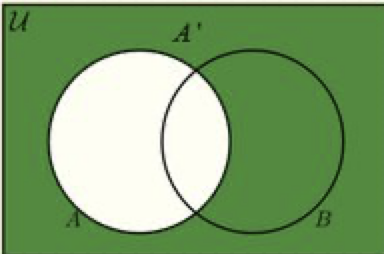

**სიმრავლეების თანაკვეთა** - $A \cap B$ შედგება ელემენტებისგან, რომლებიც შედის $A$ შიც და $B$ შიც

> $P(A \cap B) +P(A \cap B') = P(A)$



> $A \cap (B \cap C) = (A \cap B) \cap C $



   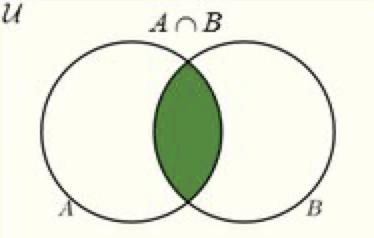

**სიმრავლეების გაერთიანება** - $ A \cup B $ შედგება ყველა იმ ელემენტისგან, რომლებიც არის $A$ ან $B$ სიმრავლეში.


   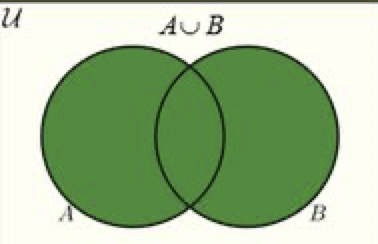

## პირობითი ალბათობა

განვიხილოთ ორი ხდომილება A და B. დავუშვათ, ჩვენ გვაინტერესებს 
A-ს ალბათობის დადგენა, თუ B უკვე განხორციელდა. ასეთი შემთხვევის განხილვა ხდება პირობითი ალბათობის ცნების შემოღებით. ხშირად რაიმე ხდომილების მოხდენის ალბათობა დამოკიდებულია იმაზე, განხორციელდა თუ არა სხვა ხდომილებები. 

A-ს ალბათობა იმ პირობაში, რომ B უკვე მოხდა


$P(A \mid B) = \frac{P(A \cap B)}{P(B)} \hspace{0.5cm}  \text{for } P(B) >0$

უკეთ გასაგებად, განვიხილოთ მარტივი მაგალითი:

ყუთში 3 თეთრი და 3 შავი ბურთია. ყუთიდან ორჯერ იღებენ ერთ ბურთს და უკან არ აბრუნებენ. იპოვეთ თეთრი ბურთის ამოღების ალბათობა მეორე ცდაზე ( A ხდომილება), თუ პირველ ცდაზე შავი ბურთი იქნა ამოღებული ( B ხდომილება).

#### ამოხსნა
პირველი ცდის შემდეგ ყუთში დარჩა 5 ბურთი, მათგან 3 თეთრი. საძებნი პირობითი ალბთობა ტოლია:

$$
P(A \mid B)  = \frac{3}{5}
$$

ეს შედეგი შესაძლებელია მივიღოთ შემდეგი ფორმულით:

$$
P(A \mid B)  = \frac{P(A \cap B)}{P(B)} \quad P(B) > 0
$$

მართლაც, პირველ ცდაში თეთრი ბურთის ამოღების ალბათობა ტოლია:

$$
P(B) = \frac{3}{6} = \frac{1}{2}
$$

მოვძებნოთ ალბათობა P(AB), რომ პირველ ცდაში გამოჩნდება შავი ბურთი, ხოლო მეორეში თეთრი. ორი ბურთის (ფერს არ აქვს მნიშვნელობა) ერთად ამოღების ვარიანტების რაოდენობაა:

$$
A_6^2 = 6 \cdot 5 = 30
$$

ამ რაოდენობიდან AB-ის ხდომილების ხელშემწყობია:

$$
3 \cdot 3 = 9
$$

შემდეგ:

$$
P(A) = \frac{9}{30} = \frac{3}{10}
$$

საძიებელი პირობითი ალბათობა ტოლია:

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)} = \frac{3}{10} \div \frac{1}{2} = \frac{3}{5}
$$

როგორც ვხედავთ, იგივე შედეგი მივიღეთ.

## დამოუკიდებელი და დამოკიდებული ალბათობები






ალბათობის თეორიაში A და B ხდომილებას ეწოდება **დამოუკიდებელი**, თუ ერთ-ერთი მათგანის მოხდენა არ ცვლის მეორე მათგანის მოხდენის ალბათობას, წინააღმდეგ შემთხვევაში, ამ ხდომილებებს ეწოდებათ **დამოკიდებული.**



### დამოუკიდებელი ალბათობა

მოდი, ვნახოთ, როგორ ვანგარიშობთ პირველი და მეორე ხდომილების მოხდენის ალბათობას (ორივეს ერთად მოხდენის).

ჯერ დავაკვირდეთ დამოუკიდებელ ხდომილობებს:

მაგალითად, მონეტის ორჯერ აგდება (რადგან წინა აგდება გავლენას არ ახდენს მომდევნო აგდების შედეგზე)



> რას უდრის თანაბარი მონეტის ორჯერ აგდებისას ზედიზედ ორჯერ "გერბის" მოსვლის ალბათობა?



1. ერთი აგდებისას "გერბის" მოსვლის ალბათობა:
   $P(\text{გერბი}) = \frac{1}{2}$

2. ორი დამოუკიდებელი მოვლენის ერთდროულად მოხდენის ალბათობა ტოლია ამ მოვლენების ალბათობების ნამრავლისა:
   
   P(A და B) = P(A) * P(B) = $P(\text{გერბი და გერბი}) = P(\text{გერბი}) \cdot P(\text{გერბი})$ = $P(\text{ორჯერ გერბი}) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$

3. შესაბამისად:
   
   თანაბარი მონეტის ორჯერ აგდებისას ზედიზედ ორჯერ "გერბის" მოსვლის ალბათობა არის $\frac{1}{4}$ ანუ $0.25$



### დამოკიდებული ალბათობა

მოდი განვიხილოთ **დამოკიდებული** ალბათობის კლასიკური მაგალითი სტანდარტულ 52-ბანქოიან დასტაზე

> ორი კარტის ამოღების შემთხვევაში, რა არის ალბათობა იმის, რომ ორივე ამოღებული კარტი შავი ფერის იქნება?



ალბათობა იმისა, რომ მეორე კარტი შავი ფერის იქნება იცვლება იმის მიხედვით, პირველი ამოღებული კარტი შავი ფერის იყო თუ თეთრის შესაბამისად ეს ალბათობა პირველზეა დამოკიდებული.

1. სტანდარტულ 52 ბანქოიან დასტაში არის 26 შავი ბანქო (13 ჯვარი და 13 ყვავი).

2. პირველი შავი ბანქოს ამოღების ალბათობა არის $\frac{26}{52} = \frac{1}{2}$ რადგან 52 ბანქოდან 26 არის შავი.

3. მეორე შავი ბანქოს ამოღების ალბათობა პირველის შემდეგ არის $\frac{25}{51}$ რადგან დარჩა 51 ბანქო და მათგან 25 არის შავი.

4. როგორც უკვე ვთქვით ორივე მოვლენის ერთდროულად მოხდენის ალბათობა გამოითვლება ამ ორი ალბათობის გამრავლებით:

   $P(\text{ორივე შავი}) = P(\text{პირველი შავი}) \times P(\text{მეორე შავი} | \text{პირველი შავი})$
   $= \frac{26}{52} \times \frac{25}{51}$

5. გამოვთვალოთ:

   $P(\text{ორივე შავი}) = \frac{1}{2} \times \frac{25}{51} \approx 0.245$


> ნებისმიერი ორი ხდომილობისთვის შეგვიძლია ვთქვათ, რომ P(A და B) = P(A) * P(B|A)




## სრული ალბათობის ფორმულა

გავიხსენოთ, რომ P(B|A) ნიშნავს “თუ მოცემულია, რომ” -ს. ანუ B ს ალბათობა იმ პირობაში, როცა A უკვე მოხდა. ანუ, **თუ ხდომილებები დამოუკიდებელია, P(B|A) = P(B)**

\begin{equation}
    P(B) = \sum_{i=1}^n P(A_i)P(B \mid A_i)
\end{equation}

## ბაიესის ფორმულა:

პირობითი ალბათობის ფორმულიდან

> $P(A \cap B) = P(A)P(B|A) = P(B)P(A|B)$

მიიღება ე.წ. **ბაიესის ფორმულა**

> $P(A|B) = P(A)P(B|A) / P(B)$



ბაიესის ფორმულიდან სრული ალბათობის ფორმულის გამოყენებით ვიღებთ ბაიესის თეორემას:



\begin{equation}
    P(A_i \mid B) = \frac{P(A_i)P(B \mid A_i)}{\sum_{j=1}^n P(A_j)P(B \mid A_j)}
\end{equation}

ორივე ამ ფორმულაში ერთი პირობითი ალბათობა იცვლება შებრუნებული ალბათობებით, რომლებიც ხშირ შემთხვევაში შედარებით მარტივად გამოითვლება, ან პირდაპირ არის მოცემული და მათი კომბინაციით ითვლება პირდაპირი პირობითი ალბათობა.


*მაგალითად:*




ყუთში მოთავსებულია ორი მონეტა:


* A1 - სიმეტრიული მონეტა, გერბის მოსვლის ალბათობით 1/2,


* A2 - არასიმეტრიული მონეტა, გერბის მოსვლის ალბათობთ 1/3.


შემთხვევით ვიღებთ ერთ მონეტას და ვაგდებთ.

> დავუშვათ, მოვიდა გერბი - რა არის ალბათობა იმისა, რომ ამოღებული მონეტა იყო სიმეტრიული?



*ამოხნსა:*

ამ შემთხვევაში ჩვენი ელემენტარულ ხდომილებათა სივრცე იქნება:

$$\Omega = \{ \{A1, \text{გ}\}, \{A1, \text{ს}\}, \{A2, \text{გ}\}, \{A2, \text{ს}\} \}$$

ნამრავლის ალბათობის ფორმულის გამოყენებით შეგვიძლია გამოვითვალოთ, რომ:

$$
\begin{align*}
P(\{A1,\text{გ}\}) &= \frac{1}{4} \\
P(\{A1,\text{ს}\}) &= \frac{1}{4} \\
P(\{A2, \text{გ}\}) &= \frac{1}{6} \\
P(\{A2,\text{ს}\}) &= \frac{1}{3}
\end{align*}
$$

ალბათობა იმისა, რომ $A1$ სიმეტრიული მონეტა იყო *(წინა პირობაში გერბი რომ ამოვიდა)*

$$
P(A1|\text{გ}) = \frac{P(A1)P(\text{გ}|A1)}{P(A1)P(\text{გ}|A1) + P(A2)P(\text{გ}|A2)} = \frac{3}{5}
$$

### ე.წ. "მონტი ჰოლის პარადოქსი":



> ერთ-ერთი საინტერესო და ცნობილი ამოცანა პირობით ალბათობაზე, რომელიც ბაიესის თეორემით შეგვიძლია ამოვხსნათ.




წარმოიდგინეთ, რომ თქვენ გახდით თამაშის მონაწილე, სადაც თქვენ უნდა აირჩიოთ სამი კარიდან ერთ-ერთი.

ერთი კარის უკან არის ავტომობილი, ხოლო დანარჩენი ორის უკან – თხები.

თქვენ ირჩევთ რომელიმე კარს, მაგალითად, ნომერ 1-ს, ამის შემდეგ ტელეწამყვანი, რომელმაც იცის თუ სად არის ავტომობილი ხსნის რომელიმე სხვა კარს, მაგალითად, ნომერ 3-ს, სადაც თხაა.


ამის შემდეგ იგი გეკითხებათ, გსურთ თუ არა გადაწყვეტილების შეცვლა და კარი ნომერი 2-ის არჩევა 1-ის ნაცვლად.

> იზრდება თუ არა თქვენი მოგების შანსები თუ დაუჯერებთ წამყვანს და შეცვლით გადაწყვეტილებას?






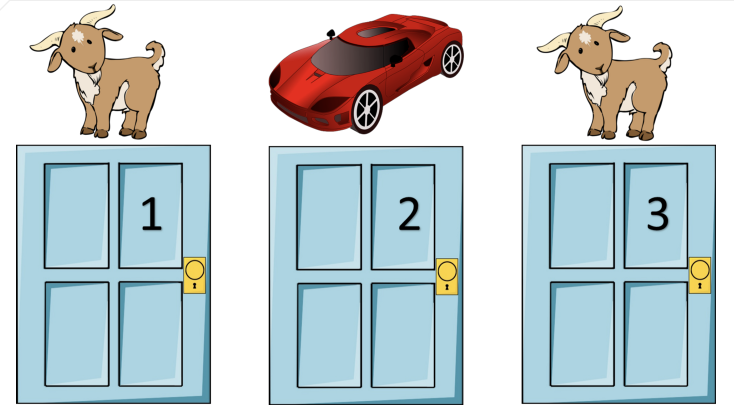


    

შეიძლება იფიქროთ, რომ გადაწყვეტილების შეცვლა არანაირ პრივილეგიას არ მოგცემთ, სინამდვილეში, ასეთ სიტუაციაში გადაწყვეტილების შეცვლა მოგების შანსებს ზრდის

ბაიესის თეორემა დაგვეხმარება ამ გაუგებრობის გარკვევაში.
ვთქვათ, ავირჩიეთ ნომერი 1.


მონტიმ კი გაგვიხსნა სხვა კარი (3), რომლის უკანაც არის თხა.


იმის გასარკვევად, უნდა შევცვალოთ თუ არა ჩვენი გადაწყვეტილება, დაგვჭირდება დავითვალოთ ალბათობა იმისა, რომ 1 კარის უკან არის მანქანა, იმ პირობაში, რომ მესამე კარის უკან თხა.


მოდი H-ით აღვნიშნოთ ჰიპოთეზა, რომ 1 კარის უკან არის მანქანა. E-თი აღვნიშნოთ მოცემულობა, რომ მესამე კარის უკან არის თხა.


ე.ი. ჩვენ გვინდა დავითვალოთ P(H|E) , ანუ ალბათობა იმისა, რომ 1 კარის უკან არის მანქანა, იმ პირობაში, რომ მესამე კარის უკან არის თხა. ბაიესის თეორემის მიხედვით:


$$
P(H | E) = \frac{P(E | H)}{P(E)} P(H) = \frac{P(E | H) \times P(H)}{P(E | H) \times P(H) + P(E | \text{not}H) \times P(\text{not}H)}.
$$


* P(H) - ყოველგვარი წინასწარი ცოდნის გარეშე, ალბათობა იმისა, რომ 1 კარის უკან არის მანქანა, არის 1/3


* P(notH) - შესაბამისად, 2/3



* P(E|H)  - იმის ალბათობა, რომ წამყვანმა გვაჩვენა თხიანი კარი, იმ პირობაში, რომ
პირველი კარის უკან მანქანა - 1.


* (წამყვანმა თხიანი კარი გვაჩვენა მიუხედავად იმისა, პირველი კარის უკან მანქანა არის თუ თხა)


* P(E|notH) - ანალოგიურად, ესეც 1 გამოდის.



$$
P(H | E) = \frac{1 \times \frac{1}{3}}{1 \times \frac{1}{3} + 1 \times \frac{2}{3}} = \frac{\frac{1}{3}}{1} = \frac{1}{3}.
$$

იმისა შანსი, რომ ავტობომილი სხვა კარის უკანაა 2/3 გამოდის.


ამგვარად, თავდაპირველი გადაწყვეტილების შეცვლა მოთამაშის შანსებს, რომ ის ავტომობილს მოიგებს, 2-ჯერ ზრდის 🤯

ეს არც თუ ისე ინტუიტიურია, სწორედ ამიტომაც ეწოდება ამ ამოცანას პარადოქსი.

In [12]:
def monty_hall_simulation(n_simulations, strategy):
    wins = 0
    for _ in range(n_simulations):
        doors = ['goat', 'goat', 'car']
        np.random.shuffle(doors)

        # მოთამაშე ირჩევს კარს
        choice = np.random.randint(3)

        # წამყვანი ხსნის თხიან კარს
        remaining_doors = [i for i in range(3) if i != choice and doors[i] != 'car']
        opened_door = np.random.choice(remaining_doors)

        if strategy == 'switch':
            final_choice = [i for i in range(3) if i != choice and i != opened_door][0]
        else:
            final_choice = choice

        if doors[final_choice] == 'car':
            wins += 1

    return wins / n_simulations

def plot_monty_hall(n_simulations):
    stay_prob = monty_hall_simulation(n_simulations, 'stay')
    switch_prob = monty_hall_simulation(n_simulations, 'switch')

    plt.figure(figsize=(10, 5))
    plt.bar(['არ შეცვალო', 'შეცვალე'], [stay_prob, switch_prob])
    plt.title(f'მონტი ჰოლის პარადოქსი ({n_simulations} სიმულაცია)')
    plt.ylabel('მოგების ალბათობა')
    plt.show()

interact(plot_monty_hall, n_simulations=widgets.IntSlider(min=100, max=100000, step=100, value=10000))


interactive(children=(IntSlider(value=10000, description='n_simulations', max=100000, min=100, step=100), Outp…

<function __main__.plot_monty_hall(n_simulations)>